In [1]:
from SchedulingProblem import ProjectSchedulingModel
from EventList import EventList

In [2]:
psmodel = ProjectSchedulingModel.from_file("j30.sm/j3031_1.sm")

In [3]:
solution = EventList(psmodel)
# solution.plot()
# for event in solution.events:
#     print(f"Event {event.id} at time {event.startTime}, jobs: {', '.join(str(job.id + 1) for job in event.jobs)}")

[0, 2, 8, 5, 1, 7, 4, 16, 21, 14, 27, 3, 9, 12, 10, 13, 11, 17, 18, 6, 20, 19, 30, 22, 23, 26, 28, 15, 24, 25, 29, 31]
[0, 2, 8, 3, 5, 1, 4, 16, 21, 14, 27, 9, 12, 10, 7, 13, 11, 17, 18, 6, 20, 19, 28, 30, 15, 22, 23, 24, 25, 26, 29, 31]


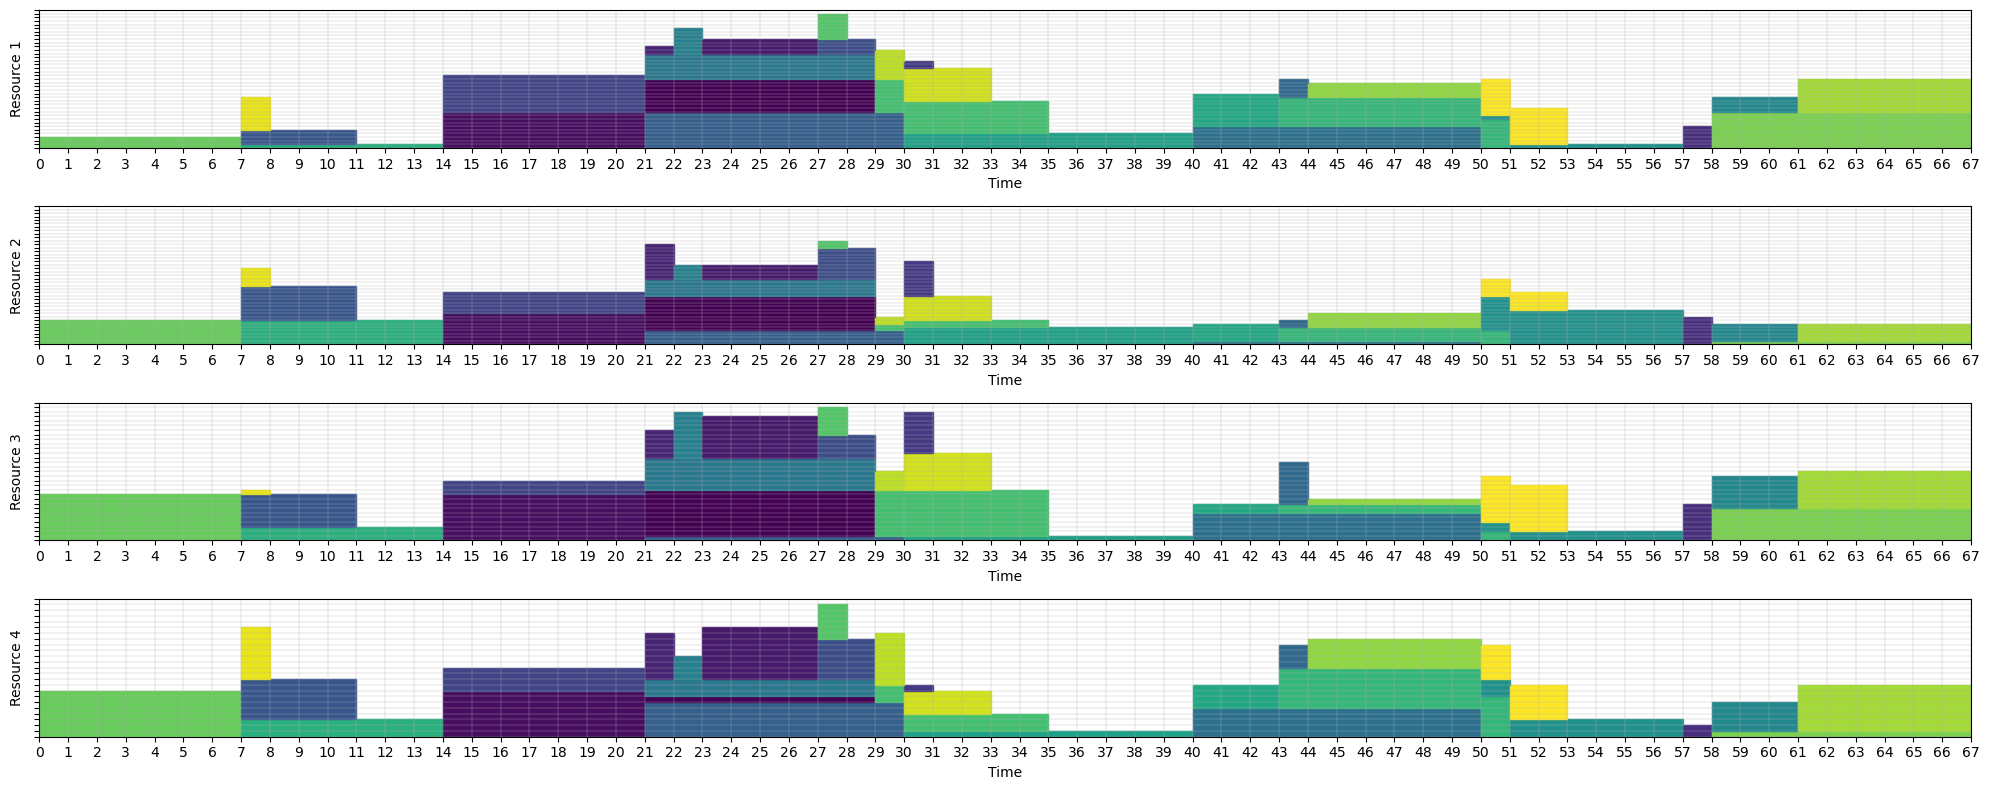

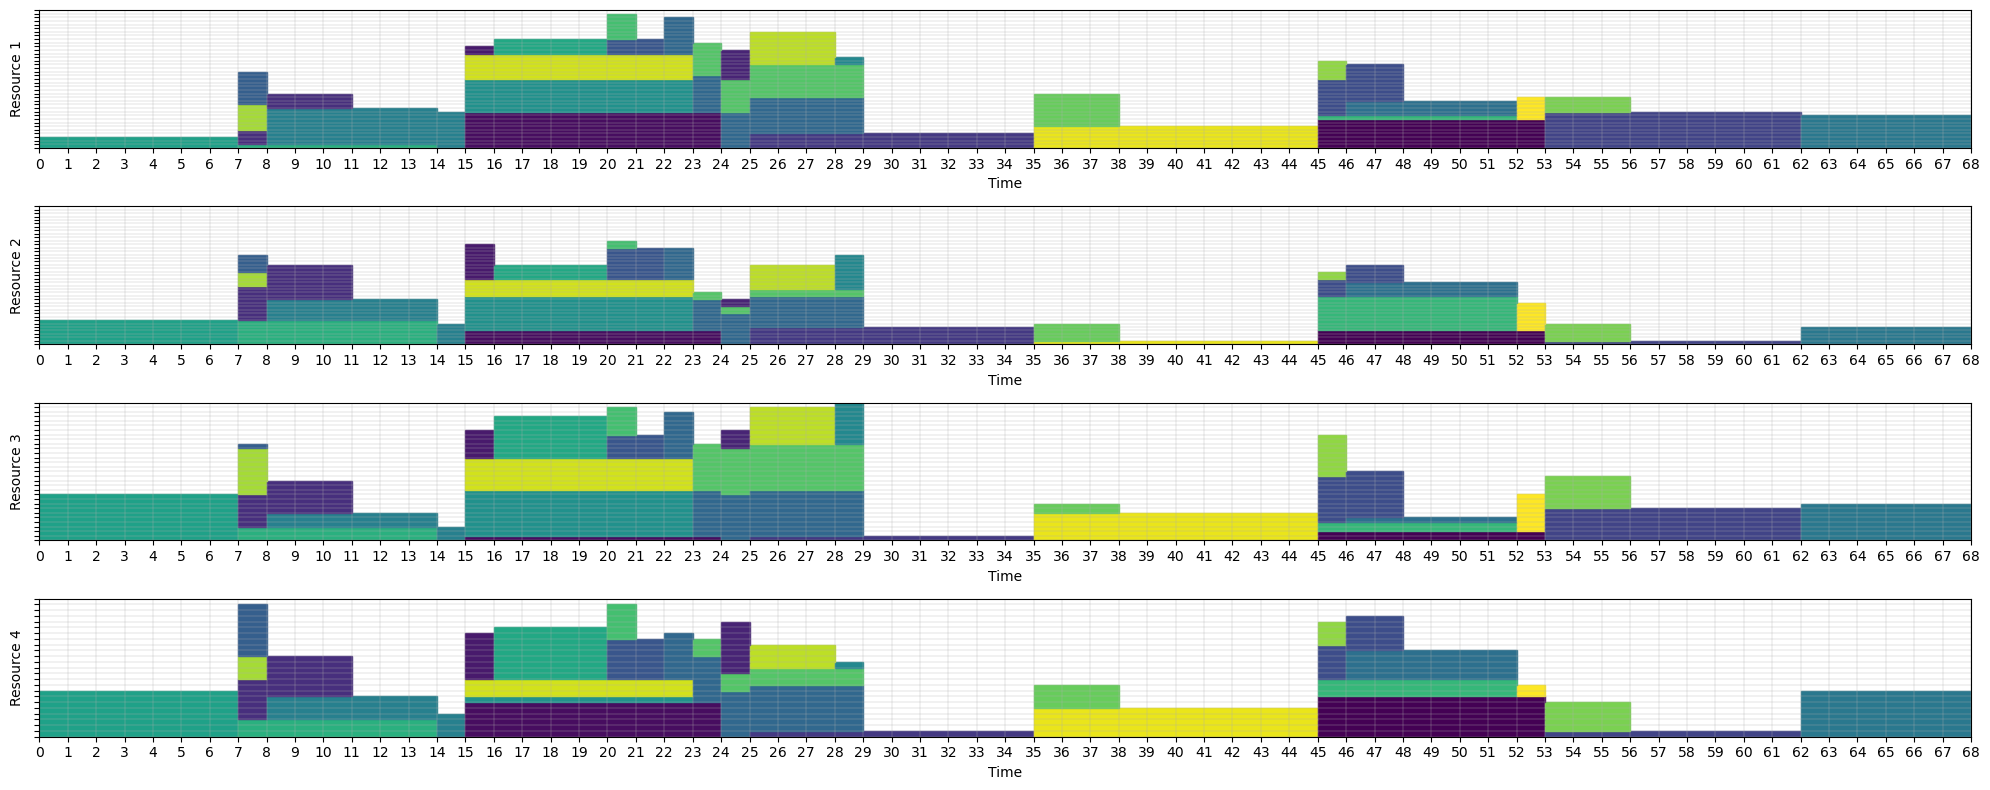

In [4]:
new_solution = solution.generate_new_local_solution(steps=3)
print([j.id for j in solution.jobs])
print([j.id for j in new_solution.jobs])
solution.plot()
new_solution.plot()